# Task # 1 - Prediction Using Supervised ML
## Problem Statement:

Predict the % of a student based on the no. of study hours.
What will be predicted score if a student studies for 9.25 hrs/day ?

## Author: Kranti Sambhaji Walke
## Import the necessary libraries

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Importing libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
#import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

## Reading data from remote link 

In [2]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Basic EDA 

In [3]:
s_data.columns

Index(['Hours', 'Scores'], dtype='object')

In [4]:
s_data.shape

(25, 2)

In [5]:
s_data.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


## 5 point summary of numerical attributes

In [7]:
s_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


## Checking the presence of missing values

In [8]:
val=s_data.isnull().values.any()

if val==True:
    print("Missing values present : ", s_data.isnull().values.sum())
    my_data=iris_df.dropna()
else:
    print("No missing values present")

No missing values present


## Finding unique data 

In [9]:
s_data.apply(lambda x: len(x.unique()))

Hours     23
Scores    23
dtype: int64

In [10]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
s_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [12]:
#Find Mean
s_data.mean()

Hours      5.012
Scores    51.480
dtype: float64

In [13]:
#Find Median
s_data.median()

Hours      4.8
Scores    47.0
dtype: float64

In [14]:
#Find Standard Deviation
s_data.std()

Hours      2.525094
Scores    25.286887
dtype: float64

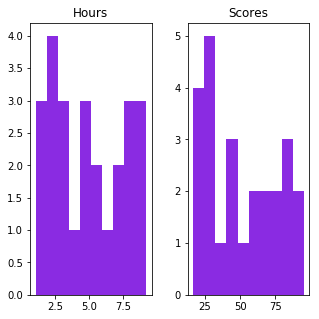

In [15]:
# Ploting histogram to check that if data columns are normal or almost normal or not
s_data.hist(figsize=(5,5),color="blueviolet",grid=False)
plt.show()

## Cleaning the negative values

In [16]:
s_dataExp = s_data.loc[s_data['Scores'] >0]
negExp = s_data.Scores < 0
column_name = 'Scores'
s_data_list = s_data.loc[negExp]['Hours'].tolist()

In [17]:
negExp.value_counts()

False    25
Name: Scores, dtype: int64

## Measure of skewness 

In [18]:
s_data.skew(axis = 0, skipna = True) 

Hours     0.190338
Scores    0.233965
dtype: float64

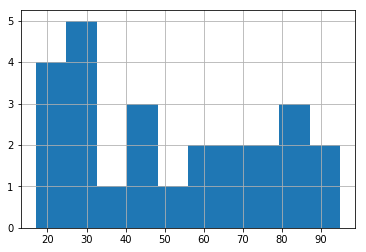

In [19]:
s_data['Scores'].hist(bins=10)

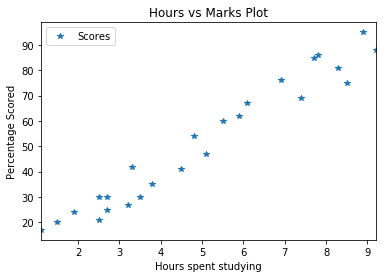

In [20]:
s_data.plot(x='Hours',y='Scores',style='*')
plt.title('Hours vs Marks Plot' )
plt.xlabel('Hours spent studying')
plt.ylabel('Percentage Scored')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


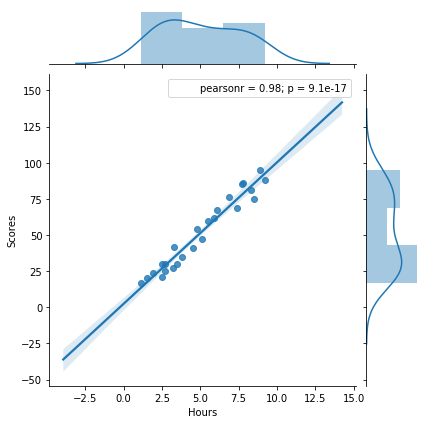

In [21]:
sns.jointplot(s_data['Hours'], s_data['Scores'], kind = "reg").annotate(stats.pearsonr)
plt.show()

### There is a positive linear relation between the number of hours studied and percentage of score. 

## Calculate the correlation matrix 

In [22]:
cor=s_data.corr()
cor

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Heatmap 

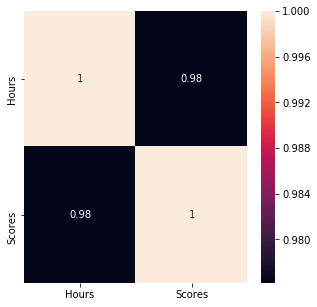

In [23]:
plt.subplots(figsize=(5,5))
sns.heatmap(cor,annot=True)

##  Split the features into training and test sets 

In [24]:
from sklearn.model_selection import train_test_split
x=s_data.iloc[:,:-1].values
y=s_data.iloc[:,-1].values
test_size = 0.30 # taking 70:30 training and test set
seed = 15  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed) # To set the random state
type(X_train)

numpy.ndarray

## Initialize and train the model

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
r_sq = model.score(x,y)
print("Coefficient Of Determination:", r_sq)
print("Intercept:", model.intercept_)
print("Slope:", model.coef_)

Coefficient Of Determination: 0.9504397845341096
Intercept: 2.253936022900504
Slope: [10.0339202]


## Ploting the regressor Line

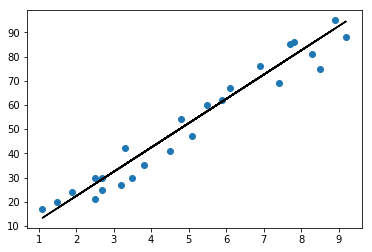

In [27]:
line=model.coef_*x+model.intercept_

plt.scatter(x,y)
plt.plot(x,line,c='black')
plt.show()

### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [28]:
#make predictions on test set
prediction = model.predict(X_test)
print(X_test)

[[2.5]
 [3.8]
 [3.2]
 [5.1]
 [9.2]
 [7.8]
 [6.1]
 [8.5]]


In [29]:
print ("Comparing Actual vs Predicted")
df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
df

Comparing Actual vs Predicted


,Actual,Predicted
0,30,27.338737
1,35,40.382833
2,27,34.362481
3,47,53.426929
4,88,94.566002
5,86,80.518514
6,67,63.460849
7,75,87.542258


In [30]:
# check the accuracy on the training set
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9634639403771951
0.9156178896102483


In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Mean Absolute Error: ',mean_absolute_error(prediction,y_test))
print('Mean Squared Error: ',mean_squared_error(prediction,y_test))

Mean Absolute Error:  6.245300336292862
Mean Squared Error:  46.82020503203866


## Predictions
### What will be predicted score if a student studies for 9.25 hrs/ day?

In [32]:
hours=np.array([9.5]).reshape(-1,1)
predict_score = model.predict(hours)
print("Hours:", hours[0][0])
print("Predicted Score:", predict_score[0])

Hours: 9.5
Predicted Score: 97.5761778977623
